In [15]:
%matplotlib inline
import numpy as np
import scipy as sp
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
G = nx.karate_club_graph()

In [17]:
L = nx.laplacian_matrix(G).toarray()

In [120]:
l, U = np.linalg.eigh(L)

In [19]:
l

array([  1.31056895e-15,   4.68525227e-01,   9.09247664e-01,
         1.12501072e+00,   1.25940411e+00,   1.59928308e+00,
         1.76189862e+00,   1.82605521e+00,   1.95505045e+00,
         2.00000000e+00,   2.00000000e+00,   2.00000000e+00,
         2.00000000e+00,   2.00000000e+00,   2.48709173e+00,
         2.74915718e+00,   3.01396297e+00,   3.24206748e+00,
         3.37615409e+00,   3.38196601e+00,   3.47218740e+00,
         4.27587682e+00,   4.48000767e+00,   4.58079267e+00,
         5.37859508e+00,   5.61803399e+00,   6.33159222e+00,
         6.51554463e+00,   6.99619703e+00,   9.77724095e+00,
         1.09210675e+01,   1.33061223e+01,   1.70551712e+01,
         1.81366960e+01])

In [20]:
U[:,1]

array([-0.11213743, -0.04128789,  0.02321896, -0.05549978, -0.28460453,
       -0.32372722, -0.32372722, -0.052586  ,  0.05160128,  0.09280089,
       -0.28460453, -0.21099295, -0.1094613 , -0.01474197,  0.16275078,
        0.16275078, -0.42276533, -0.10018142,  0.16275078, -0.01363713,
        0.16275078, -0.10018142,  0.16275078,  0.15569457,  0.15302558,
        0.16096292,  0.18710956,  0.12766405,  0.0951523 ,  0.16765031,
        0.07349964,  0.09875343,  0.13034546,  0.11890326])

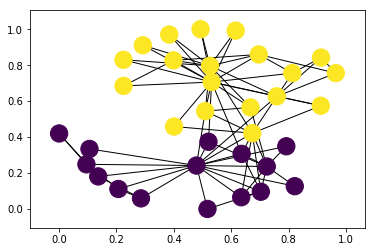

In [24]:
pos = nx.fruchterman_reingold_layout(G)
nx.draw_networkx_nodes(G, pos=pos, node_color=np.sign(U[:,1]))
nx.draw_networkx_edges(G, pos=pos)

In [25]:
N = nx.number_of_nodes(G)

In [37]:
f = np.random.rand(N)

In [38]:
f_hat = U.T.dot(f)
f_hat

array([ 2.48701305,  0.14858571, -0.06429501,  0.07528088,  0.11448494,
       -0.22117274,  0.30645059, -0.15579013,  0.22982686, -0.29913443,
        0.47082284,  0.13681457,  0.37427246, -0.29123648, -0.03169358,
       -0.41180981, -0.06213654, -0.5254294 ,  0.16656341, -0.36674654,
        0.02406823, -0.16768756,  0.15202588,  0.27247408,  0.31669827,
       -0.17367826, -0.46651268, -0.43114688, -0.16013327, -0.07577017,
        0.01841592,  0.27950506, -0.14935568,  0.30357941])

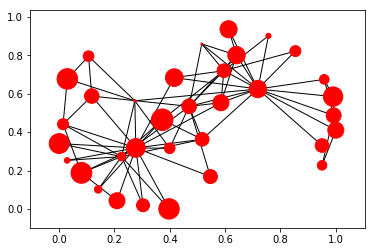

In [39]:
pos = nx.fruchterman_reingold_layout(G)
nx.draw_networkx_nodes(G, pos=pos, node_size=f*500)
nx.draw_networkx_edges(G, pos=pos)

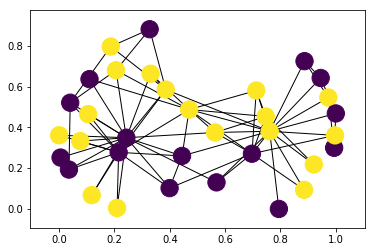

In [36]:
pos = nx.fruchterman_reingold_layout(G)
nx.draw_networkx_nodes(G, pos=pos, node_color=np.sign(f_hat))
nx.draw_networkx_edges(G, pos=pos)

In [40]:
np.allclose(L, U.dot(np.diag(l).dot(U.T)))

True

In [48]:
U.dot(np.diag(l ** 2).dot(U.T))

array([[ 272.,  -18.,  -21., ...,  -22.,    3.,    4.],
       [ -18.,   90.,  -15., ...,    1.,    2.,    3.],
       [ -21.,  -15.,  110., ...,    3.,  -21.,    6.],
       ..., 
       [ -22.,    1.,    3., ...,   42.,  -17.,  -21.],
       [   3.,    2.,  -21., ...,  -17.,  156.,  -19.],
       [   4.,    3.,    6., ...,  -21.,  -19.,  306.]])

In [69]:
# gL = L.dot(L)
sigma = 10
gl = 2. / (np.sqrt(3 * sigma) * np.pi**0.25) * (1 - (l/sigma)**2) * np.exp(-l**2 / (2 * sigma ** 2))

In [89]:
mex_hat = U.dot(np.diag(mex(l, sigma=0.1)).dot(U.T))

In [90]:
mex_hat[0]

array([ 0.08065595,  0.08066376,  0.08067087,  0.0806622 ,  0.08063693,
        0.08063262,  0.08063262,  0.08066252,  0.080674  ,  0.08067855,
        0.08063693,  0.08064505,  0.08065625,  0.08066669,  0.08068626,
        0.08068626,  0.0806217 ,  0.08065727,  0.08068626,  0.08066681,
        0.08068626,  0.08065727,  0.08068626,  0.08068548,  0.08068519,
        0.08068606,  0.08068895,  0.08068239,  0.08067881,  0.0806868 ,
        0.08067642,  0.0806792 ,  0.08068269,  0.08068142])

In [204]:
def g(x, k=2):
    thetas = np.ones(k)
#     thetas = np.append(np.zeros(k-1), 1)
    return np.array([thetas[i] * np.diag(x**i) for i in range(k)]).sum(axis=0)

In [179]:
gL = U.dot(g(l, k=3).dot(U.T))

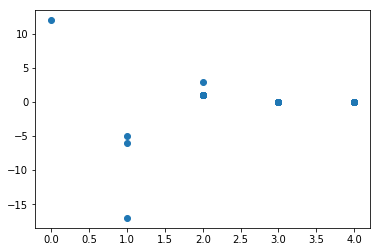

In [180]:
plt.scatter(nx.shortest_path_length(G, 10).values(), gL[10])

In [181]:
l_hat = 2*l/l.max()-1

In [182]:
l_hat

array([-1.        , -0.948334  , -0.89973392, -0.87594094, -0.86112089,
       -0.82364119, -0.80570898, -0.79863419, -0.78440942, -0.77945266,
       -0.77945266, -0.77945266, -0.77945266, -0.77945266, -0.72573927,
       -0.69684035, -0.66763925, -0.64248533, -0.6276991 , -0.6270582 ,
       -0.61710916, -0.52848338, -0.50597312, -0.49485919, -0.40688259,
       -0.38047878, -0.3017921 , -0.28150699, -0.22850369,  0.07817223,
        0.20430618,  0.46731492,  0.88073629,  1.        ])

In [183]:
scaled_L = 2 * L / l.max() - np.identity(N)

In [184]:
scaled_L

array([[ 0.7643787 , -0.11027367, -0.11027367, ..., -0.11027367,
         0.        ,  0.        ],
       [-0.11027367, -0.00753698, -0.11027367, ...,  0.        ,
         0.        ,  0.        ],
       [-0.11027367, -0.11027367,  0.10273669, ...,  0.        ,
        -0.11027367,  0.        ],
       ..., 
       [-0.11027367,  0.        ,  0.        , ..., -0.33835799,
        -0.11027367, -0.11027367],
       [ 0.        ,  0.        , -0.11027367, ..., -0.11027367,
         0.32328402, -0.11027367],
       [ 0.        ,  0.        ,  0.        , ..., -0.11027367,
        -0.11027367,  0.87465237]])

In [187]:
np.allclose(scaled_L, U.dot(np.diag(l_hat)).dot(U.T))

True

In [188]:
x = f

In [190]:
def x_bar(x, scaled_L, k):
    if k==0:
        return x
    elif k==1:
        return scaled_L.dot(x)
    else:
        return 2 * scaled_L.dot(x_bar(x, scaled_L, k-1)) - x_bar(x, scaled_L, k-2)

In [191]:
x_bar(x, scaled_L, 0)

array([ 0.60375649,  0.37452226,  0.42898983,  0.60195508,  0.18445281,
        0.51230711,  0.44856778,  0.00623348,  0.37347193,  0.38971775,
        0.7547787 ,  0.37131464,  0.58305956,  0.51567428,  0.83434089,
        0.78882654,  0.18233845,  0.24044626,  0.06201764,  0.6226014 ,
        0.33485704,  0.05221956,  0.11313559,  0.24568453,  0.22661947,
        0.84169361,  0.51024201,  0.41945312,  0.22961577,  0.86446081,
        0.92217043,  0.01257567,  0.14921921,  0.70033374])

In [192]:
x_bar(x, scaled_L, 1)

array([-0.20931491, -0.44326096, -0.35992775, -0.48070978, -0.32270782,
       -0.50571418, -0.41422677, -0.22504839, -0.47681049, -0.42830119,
       -0.64849477, -0.39694685, -0.58742556, -0.53014064, -0.74401255,
       -0.70853626, -0.24808339, -0.29529487, -0.14202313, -0.60173853,
       -0.35468853, -0.14858106, -0.18186716, -0.43830372, -0.29210703,
       -0.61671315, -0.57026513, -0.41105193, -0.27957547, -0.66019386,
       -0.69157335, -0.30764422, -0.5782096 , -0.20216043])

In [193]:
x_bar(x, scaled_L, 2)

array([ 0.56377139,  0.41341073,  0.39301125,  0.24276396,  0.52799003,
        0.38824396,  0.29804356,  0.57465225,  0.50453078,  0.40193031,
        0.34200957,  0.38119734,  0.48486439,  0.33391165,  0.49761277,
        0.48782295,  0.40729059,  0.36381435,  0.33149151,  0.37124999,
        0.39017733,  0.32332812,  0.34248662,  0.6919727 ,  0.45884527,
        0.21262961,  0.56893728,  0.3250823 ,  0.33637346,  0.26805663,
        0.22590546,  0.67598196,  0.63871529,  0.73354807])

In [196]:
def compute_x_bar_matrix(x, scaled_L, K):
    N = x.shape[0]
    x_bar_matrix = np.zeros((N, K))
    for k in range(K):
        if k == 0:
            x_bar_matrix[:,k] = x
        elif k == 1:
            x_bar_matrix[:,k] = scaled_L.dot(x)
        else:
            x_bar_matrix[:,k] = 2 * scaled_L.dot(x_bar_matrix[:,k-1]) - x_bar_matrix[:,k-2]
    return x_bar_matrix

In [207]:
x

array([ 0.60375649,  0.37452226,  0.42898983,  0.60195508,  0.18445281,
        0.51230711,  0.44856778,  0.00623348,  0.37347193,  0.38971775,
        0.7547787 ,  0.37131464,  0.58305956,  0.51567428,  0.83434089,
        0.78882654,  0.18233845,  0.24044626,  0.06201764,  0.6226014 ,
        0.33485704,  0.05221956,  0.11313559,  0.24568453,  0.22661947,
        0.84169361,  0.51024201,  0.41945312,  0.22961577,  0.86446081,
        0.92217043,  0.01257567,  0.14921921,  0.70033374])

In [ ]:
K = 3

In [208]:
%%timeit
thetas = np.ones(K)
x_bar_matrix = compute_x_bar_matrix(x, scaled_L, K=K)
chebyshev_filter = x_bar_matrix.dot(thetas)

The slowest run took 18.80 times longer than the fastest. This could mean that an intermediate result is being cached.
100000 loops, best of 3: 8.31 µs per loop


In [201]:
chebyshev_filter

array([ 0.95821297,  0.34467203,  0.46207333,  0.36400926,  0.38973502,
        0.3948369 ,  0.33238457,  0.35583734,  0.40119222,  0.36334687,
        0.4482935 ,  0.35556513,  0.48049838,  0.31944529,  0.58794111,
        0.56811322,  0.34154565,  0.30896574,  0.25148602,  0.39211285,
        0.37034584,  0.22696662,  0.27375505,  0.49935351,  0.39335771,
        0.43761008,  0.50891416,  0.33348349,  0.28641376,  0.47232357,
        0.45650255,  0.38091341,  0.2097249 ,  1.23172138])

In [209]:
%%timeit
naive_filter = U.dot(g(l, k=K).dot(U.T))

The slowest run took 9.34 times longer than the fastest. This could mean that an intermediate result is being cached.
10000 loops, best of 3: 35.7 µs per loop


In [206]:
naive_filter.dot(x)

array([ 67.4103602 ,  -9.95527419,  10.93455181,   6.87361909,
        -9.68269482,  -3.44472919,   0.21887091, -14.59457595,
       -12.17091033,  -5.80383429,   2.22708137,  -3.67050265,
        -4.21214592,  -9.46841118,   2.66435265,   2.34575217,
        -1.97745882,  -4.20529952,  -2.74191012,  -6.09182782,
        -0.83203428,  -5.52288642,  -2.38408446, -14.83086705,
        -1.58943824,  14.01888437,  -7.49266225,  -2.00290838,
        -4.05069546,  11.78995322,  12.31092519, -23.91550792,
       -54.17016943,  88.51813116])